In [1]:
import numpy as np
import matplotlib.pyplot as plt
import histlite as hl
import csky as cy
%matplotlib inline

In [2]:
trials_dir = ('/data/ana/analyses/NuSources/2023_galactic_center_analysis')

def ndarray_to_Chi2TSD(trials):
    return cy.dists.Chi2TSD(cy.utils.Arrays(trials))


bg_dir = f'{trials_dir}/bg_trials/'
bg = cy.bk.get_all(
        # disk location
        bg_dir,
        # filename pattern
        'trial_2011_2022*.npy',
        # how to combine items within each directory
        merge=np.concatenate,
        # what to do with items after merge
        post_convert=ndarray_to_Chi2TSD, log = False)
cy.plotting.mrichman_mpl()


/mnt/ceph1-npx/user/xk35/software/external/csky/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


/home/xk35/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


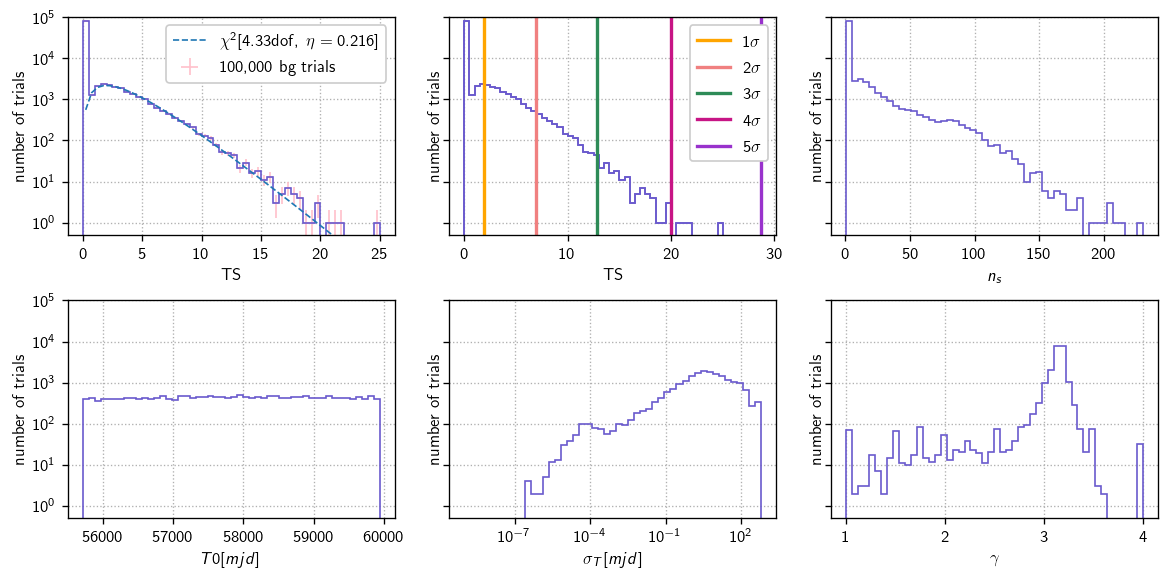

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(10,5), sharey=True)
plt.rcParams.update({'font.size': 10})
axs = axs.flatten()
labels = r'TS TS $n_s$ $T0[mjd]$ $\sigma_T[mjd]$ $\gamma$'.split()

indx = [idx for idx, ts in enumerate(bg.trials.ts) if (ts > 0.) ]
distribution_params = [bg.trials.ts, bg.trials.ts, bg.trials.ns,
                       bg.trials.t0[indx], bg.trials.dt[indx], bg.trials.gamma[indx]]

plt.tight_layout(pad=2.0)
for (i, (ax, params)) in enumerate(zip(axs, distribution_params)):
    bins = 50
    if i == 0:
        h = bg.get_hist(bins=bins)
        hl.plot1d(ax, h, crosses=True, lw = 1, color = 'pink',
            label=f'100,000 bg trials'
                 )
        x = h.centers[0]
        norm = h.integrate().values
        ax.semilogy(x, norm * bg.pdf(x), lw=1, ls='--',
            label=r'$\chi^2[{:.2f}\text{{dof}},\ \eta={:.3f}]$'.format(bg.ndof, bg.eta)
                   )
        ax.legend()
        ax.set_yticks([1e0,1e1,1e2,1e3,1e4, 1e5])
        ax.set_ylim(0.5,1e5)

    if i == 1:
        ax.hist(params, bins=bins, histtype='step', color='slateblue')
        ax.axvline(bg.isf_nsigma(1), label=r'1$\sigma$', 
                   color='orange')
        ax.axvline(bg.isf_nsigma(2), label=r'2$\sigma$', 
                   color='lightcoral')
        ax.axvline(bg.isf_nsigma(3), label=r'3$\sigma$', 
                   color='seagreen')
        ax.axvline(bg.isf_nsigma(4), label=r'4$\sigma$', 
                   color='mediumvioletred')
        ax.axvline(bg.isf_nsigma(5), label=r'5$\sigma$', 
                   color='darkorchid')
        ax.legend()

    if i == 4:
        ax.hist(params, bins=np.logspace(-9,2.8, 50), histtype='step', label=r'TS', 
                color='slateblue')
        ax.set_xscale('log')

    else:
        ax.hist(params, bins=bins, histtype='step', color='slateblue')

            
 
    ax.set_xlabel(labels[i])
    ax.set_ylabel(r'number of trials')
    #ax.legend()
    ax.grid(True)
plt.savefig('/home/xk35/BDT_corrected/From_I3_File/Final/Plots/bg_trials_100000.png')